Базовый пример
==============

В этом примере мы считаем упоминания "china" или "chinese" на телеканале CNN с группировкой по дням:

Downloading: 100%|██████████| 3897/3897 [00:01<00:00, 3210.00rows/s]


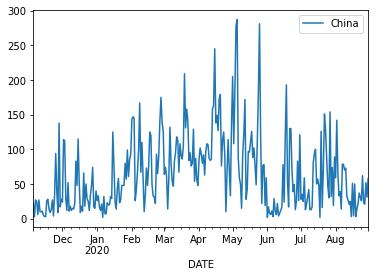

In [5]:
    import pandas_gbq
    import pandas as pd


    # ВАЖНО: это должен быть ID проекта из Вашего аккаунта Google Compute Engine
    # иначе пример не запустится
    project_id = "alien-clover-203818"

    sql = """
    SELECT DATE, sum(COUNT) China 
    FROM `gdelt-bq.gdeltv2.iatv_1gramsv2` 
    WHERE STATION='CNN' and (NGRAM='china' OR NGRAM='chinese') 
    GROUP BY DATE
    """
    df = pandas_gbq.read_gbq(sql, project_id=project_id)
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
    df = df.groupby('DATE').sum()

    df.tail(300).plot()


In [ ]:
Теперь мы можем сделать чуть более “сглаженный” график за счет группировки по месяцу. 
Для этого используем функцию `resample` из библиотеки Pandas.

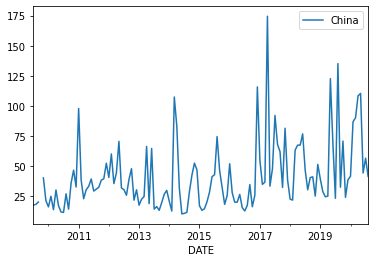

In [4]:
avg = df.resample('M').mean()
avg.plot()


In [ ]:
Если хотим сравнить Китай и Россию, то....

In [7]:
import pandas_gbq
import pandas as pd

 
# ВАЖНО: это должен быть ID проекта из Вашего аккаунта Google Compute Engine
# (иначе пример не запустится)
project_id = "alien-clover-203818"
 
sql = """
SELECT DATE, sum(China) as chi, sum(Russia) as rus from (
SELECT DATE, sum(COUNT) China, 0 Russia FROM `gdelt-bq.gdeltv2.iatv_1gramsv2` where STATION='CNN' 
    and (NGRAM='china' OR NGRAM='chinese' OR NGRAM='beijing') group by DATE
UNION ALL
SELECT DATE, 0 China, sum(COUNT) Russia FROM `gdelt-bq.gdeltv2.iatv_1gramsv2` where STATION='CNN' 
    and (NGRAM='russia' OR NGRAM='russian' OR NGRAM='moscow' OR NGRAM='kremlin' OR NGRAM='putin') group by DATE
)
GROUP BY DATE
ORDER BY DATE asc
"""
df = pandas_gbq.read_gbq(sql, project_id=project_id)
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')


Downloading: 100%|██████████| 3968/3968 [00:01<00:00, 3005.75rows/s]


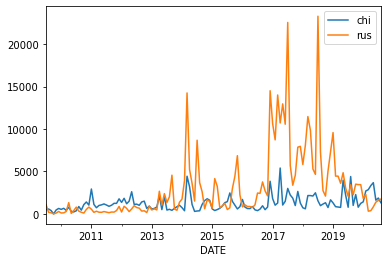

In [9]:
df.groupby('DATE').sum().resample('M').sum().plot()

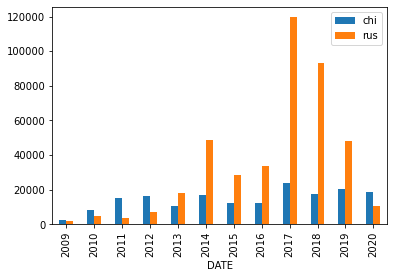

In [10]:
by_year = df.groupby('DATE').sum().resample('Y').sum()
years = by_year.index.map(lambda dt: dt.year)
by_year.set_index(years).plot.bar()

In [ ]:
*На заметку*
Исследовать датасеты GDELT и отлаживать SQL-запросы удобно в Google Big Query.
* https://monosnap.com/file/DUQWVrGc1sSJVFqqdLVpDBVkfsQmtF
* https://monosnap.com/file/2MMDVy8kYocosR4mM9nqcHpgNGzOHF   


PS: по умолчанию Big Query API может быть выключено - включить его можно тут
https://console.cloud.google.com/apis/library/bigquery.googleapis.com 


